In [29]:
import pandas as pd 
import numpy as np
import plotly 
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [13]:
df=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data')
df.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [46]:
#use geopandas to convert lat and long into points
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LNG,df.LAT))
df_geo.head()

,ZIP,LAT,LNG,geometry
0,601,18.180555,-66.749961,POINT (-66.74996 18.18055)
1,602,18.361945,-67.175597,POINT (-67.17560 18.36194)
2,603,18.455183,-67.119887,POINT (-67.11989 18.45518)
3,606,18.158345,-66.932911,POINT (-66.93291 18.15835)
4,610,18.295366,-67.125135,POINT (-67.12514 18.29537)


In [47]:
#get built in dataset from geo pandas
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

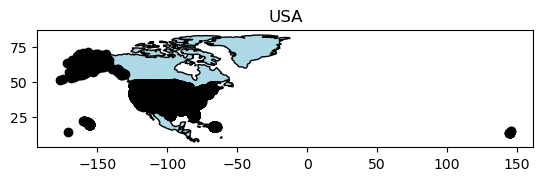

In [52]:
#plot world map
axis=world_data[world_data.continent=='North America'].plot(color='lightblue',edgecolor='black')
df_geo.plot(ax=axis,color='black')
plt.title('USA')
#fig=plt.gcf()
#fig.set_size_inches(20,10)
plt.show()

In [57]:
import folium as f
df =pd.read_csv('https://raw.githubusercontent.com/jtemporal/folium-101/main/cities.csv')
df

,name,latitude,longitude,lived,visited
0,Olinda,-7.998127,-34.908203,yes,yes
1,Recife,-8.052200,-34.928600,yes,yes
2,Miami,25.761700,-80.191800,no,yes
3,New York,40.712800,-74.006000,yes,yes
4,Graz,47.070700,15.439500,no,yes
5,Taipei,25.033000,121.565400,no,yes
6,São Paulo,-23.550500,-46.633300,no,yes
7,Osasco,-23.537200,-46.796200,yes,yes
8,Ribeirão Preto,-21.170400,-47.810300,yes,yes
9,Florianópolis,-27.598600,-48.518700,no,yes


In [59]:
len(df)

22

In [64]:
my_map=f.Map(location=[13.133,16.10])
my_map

In [67]:
city=df.loc[0]
city

name            Olinda
latitude     -7.998127
longitude   -34.908203
lived              yes
visited            yes
Name: 0, dtype: object

In [86]:
for _,city in df.iterrows():
    f.Marker(location=[city['latitude'],city['longitude']],
            popup=city['name'],
            tooltip=city['name'],
            icon=f.Icon(color=city['color'],prefix='fa',icon='circle')
            ).add_to(my_map)

In [83]:
#add color to the markers in map
def select_marker_color(row):
    if row['lived']=='yes':
        return 'pink'
    elif row['lived']=='no' and row['visited']=='yes':
        return 'purple'
    return 'blue'

In [85]:
#apply select_marker_color to df
df['color']=df.apply(select_marker_color,axis=1)

In [89]:
df.head()

,name,latitude,longitude,lived,visited,color
0,Olinda,-7.998127,-34.908203,yes,yes,pink
1,Recife,-8.052200,-34.928600,yes,yes,pink
2,Miami,25.761700,-80.191800,no,yes,purple
3,New York,40.712800,-74.006000,yes,yes,pink
4,Graz,47.070700,15.439500,no,yes,purple


In [91]:
my_map

In [98]:
my_map.save('map_created.html')

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import plotly.express as px

In [138]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')
df

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-12-20,207146.0,62.0,57.571,7845.0,0.0,0.286,...,NaN,37.746,0.500,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-12-20,12458381.0,2360.0,1569.286,257415.0,31.0,9.857,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-12-20,333686.0,33.0,17.000,3594.0,0.0,0.000,...,51.200,NaN,2.890,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-12-20,271182.0,3.0,4.714,6881.0,0.0,0.000,...,30.400,83.741,1.900,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-12-20,47686.0,80.0,34.286,165.0,7.0,1.000,...,37.800,NaN,NaN,83.73,0.868,7.984300e+04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WLF,Oceania,Wallis and Futuna,2022-12-20,3415.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,1.159600e+04,NaN,NaN,NaN,NaN
234,OWID_WRL,NaN,World,2022-12-20,654390931.0,677707.0,574939.571,6669519.0,2120.0,1823.000,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
235,YEM,Asia,Yemen,2022-12-20,11945.0,0.0,0.000,2159.0,0.0,0.000,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,NaN,NaN,NaN,NaN
236,ZMB,Africa,Zambia,2022-12-20,333746.0,0.0,0.000,4019.0,0.0,0.000,...,24.700,13.938,2.000,63.89,0.584,2.001767e+07,NaN,NaN,NaN,NaN


In [129]:
#locate map inside note book
po.init_notebook_mode(connected=True)

In [130]:
df.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [134]:
fig=px.choropleth(df,locations='iso_code',color='new_cases',
                 hover_name='location',
                 projection='natural earth',
                 color_continuous_scale='RdYlGn',
                 animation_frame='last_updated_date')
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'states_india.geojson'